In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from keplergl import KeplerGl
import geopandas as gpd

In [21]:
raw_df = pd.read_csv('../../../../og_data/DayNight/loons_DBSCAN_with_day_night.csv', parse_dates=['ts'],\
                          low_memory=False)

In [22]:
bl = raw_df

In [23]:
#bl['stationary'] = bl['cluster'].apply(lambda x: True if x != -1 else False)

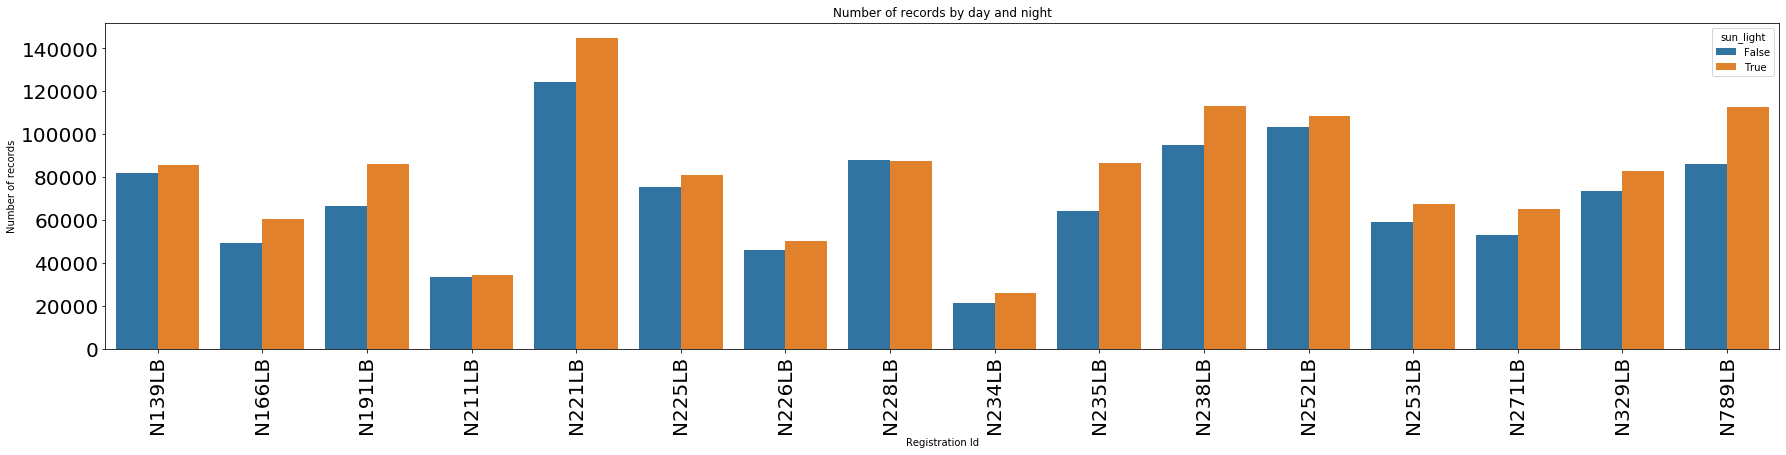

In [24]:
# Let's check the number of day records vs night records

target_alt_sun = bl.groupby(['registration_id', 'sun_light'])['ts'].count().reset_index()

plt.figure('Number of records', figsize=(30,6))

ax = sns.barplot(x=target_alt_sun['registration_id'], y="ts", hue='sun_light', \
                data=target_alt_sun)

#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('Number of records')
dummy = ax.set_xlabel('Registration Id')
dummy = ax.set_title('Number of records by day and night')
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=20)

# there are slightly more day records than night records


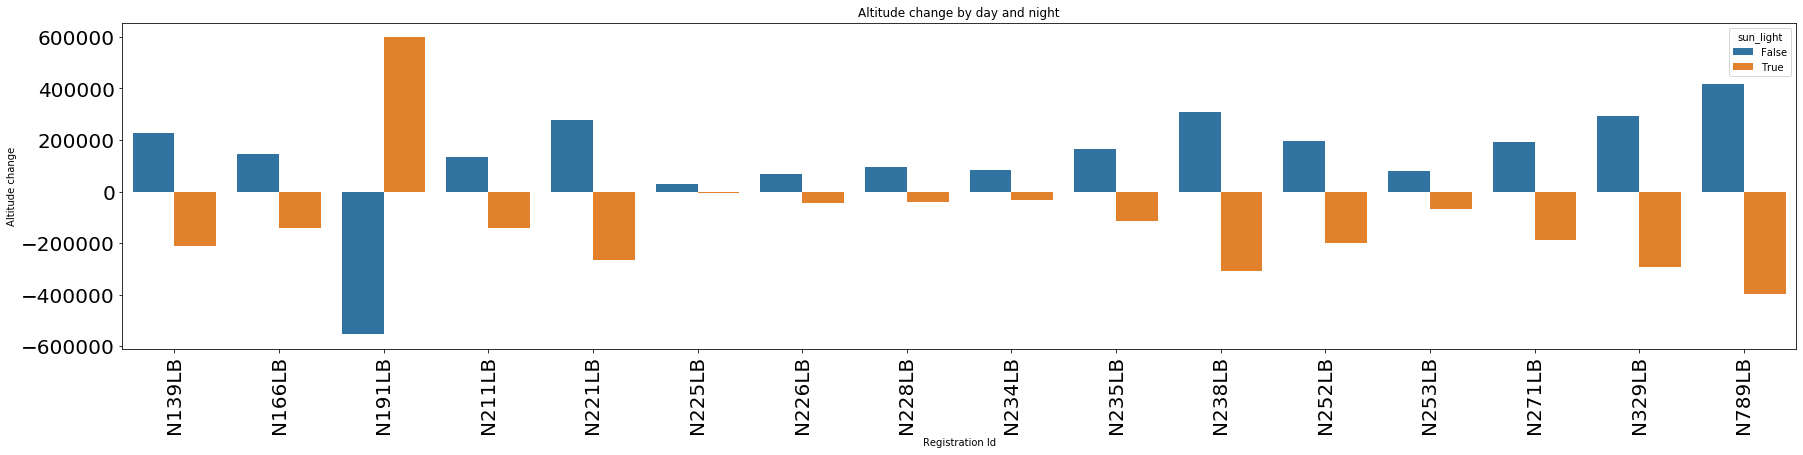

In [25]:
# Let's check how the altitude varies during day and night

target_alt_sun = bl.groupby(['registration_id', 'sun_light'])['alt_change'].sum().reset_index()

plt.figure('Alttitude Change', figsize=(30,6))

ax = sns.barplot(x=target_alt_sun['registration_id'], y="alt_change", hue='sun_light', \
                data=target_alt_sun)

#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('Altitude change')
dummy = ax.set_xlabel('Registration Id')
dummy = ax.set_title('Altitude change by day and night')
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=20)

# During the day loons tend to go down while at night tend to go up. Why?


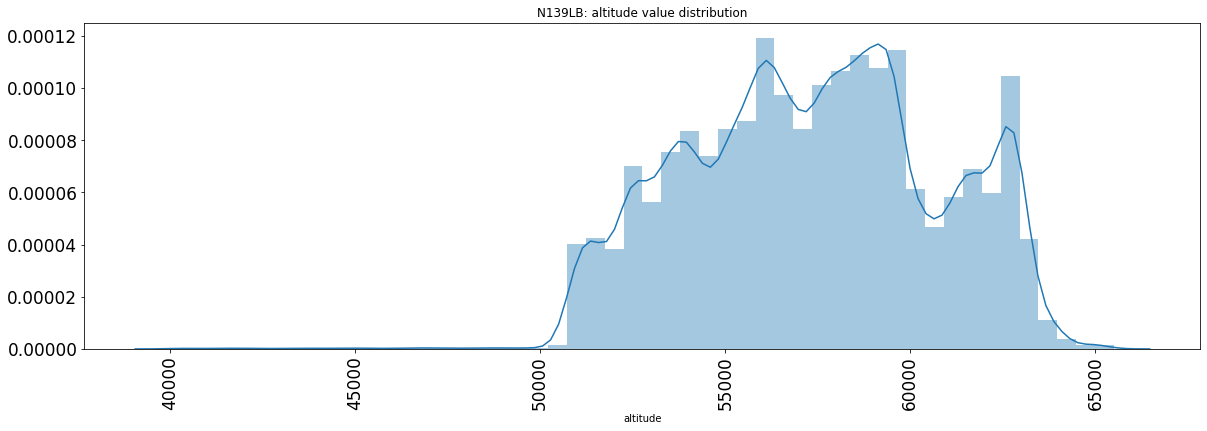

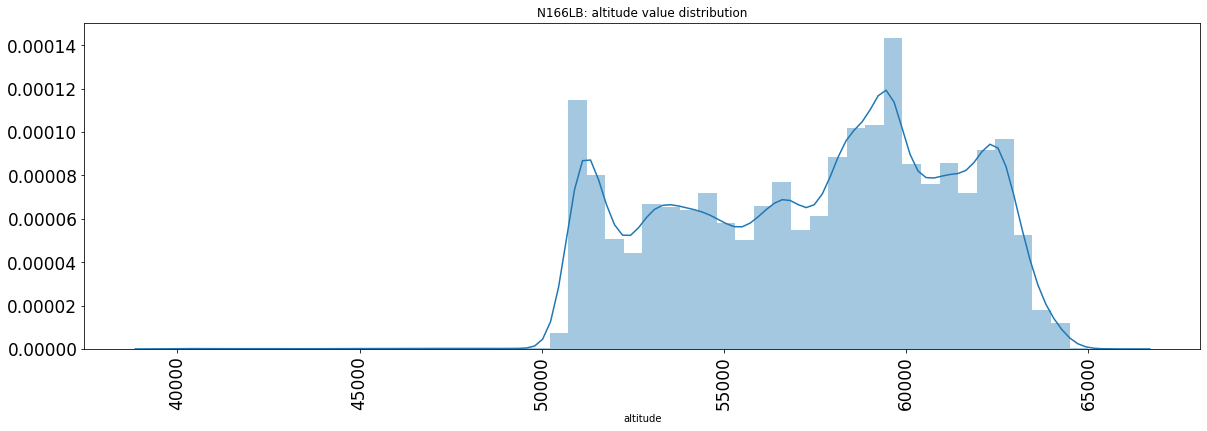

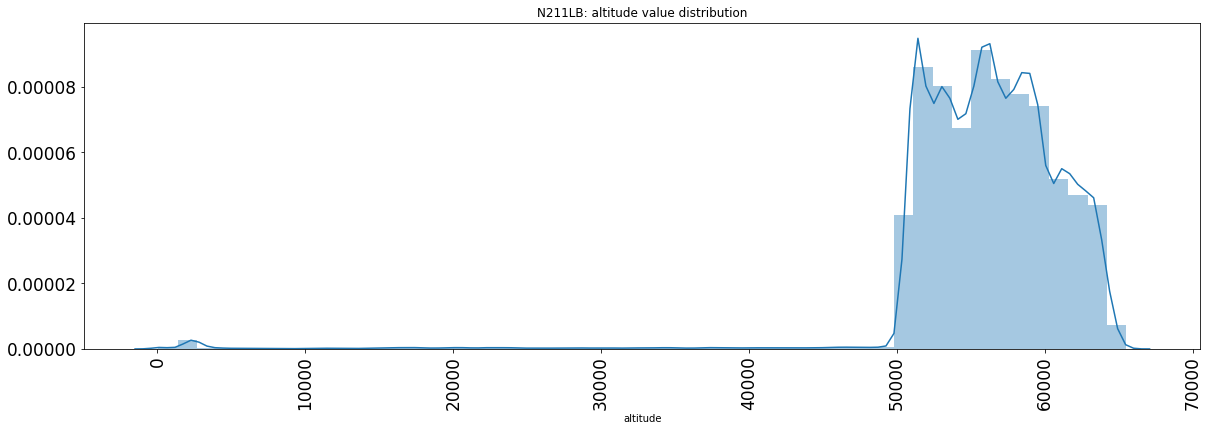

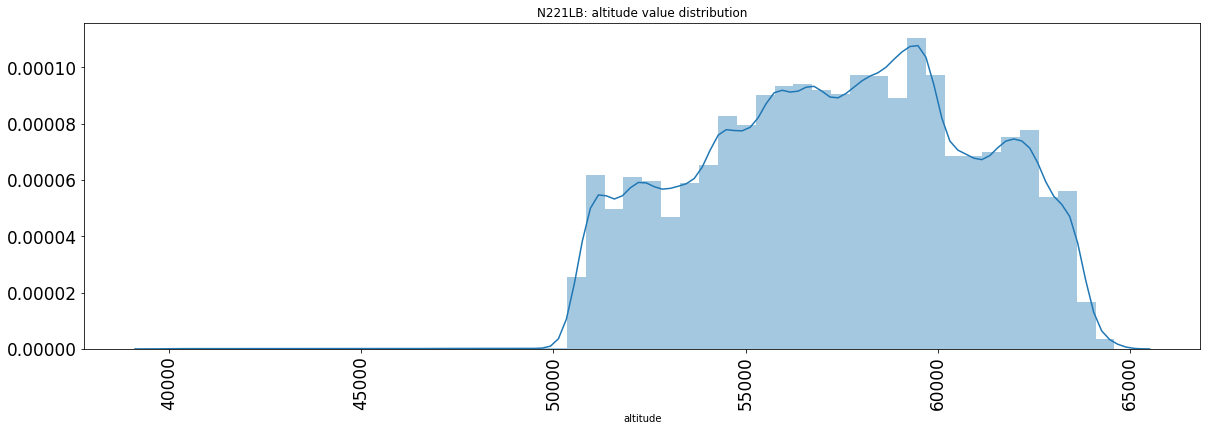

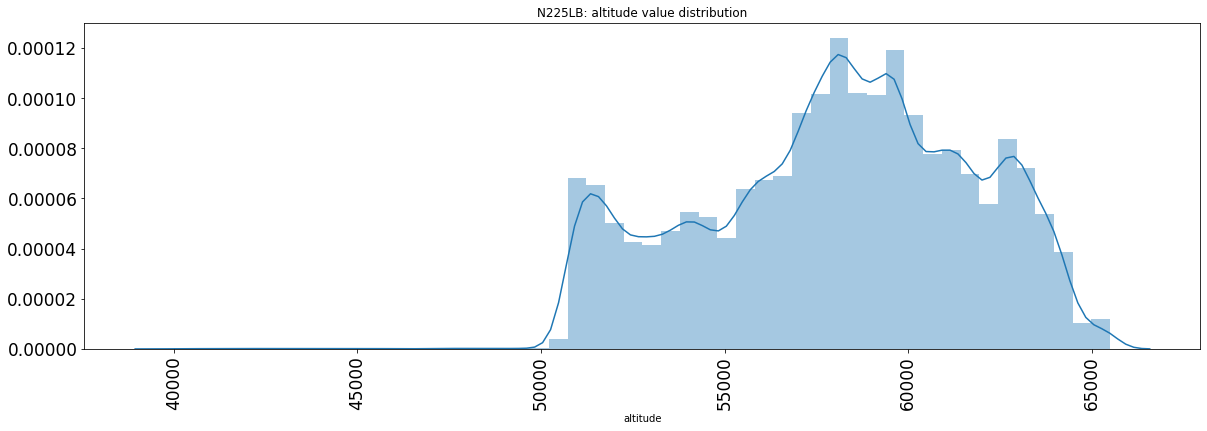

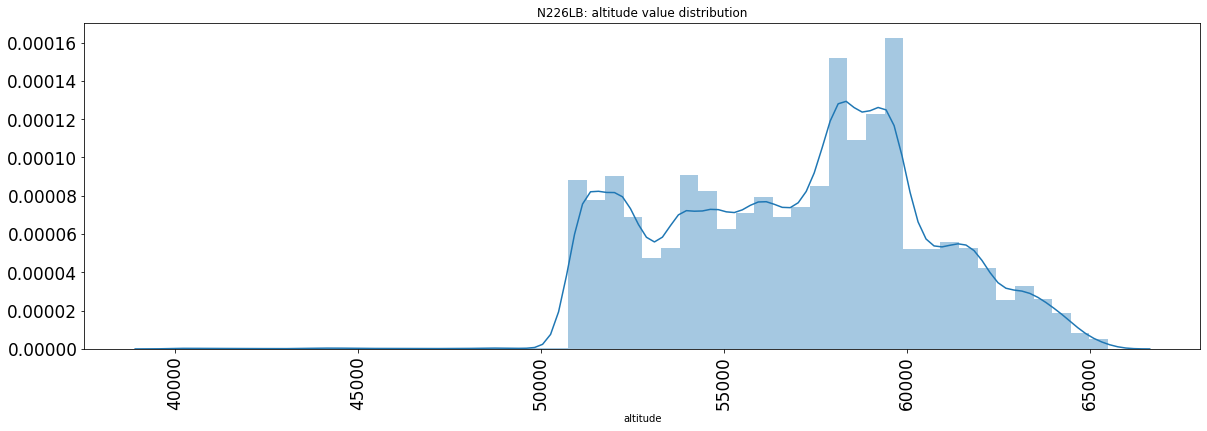

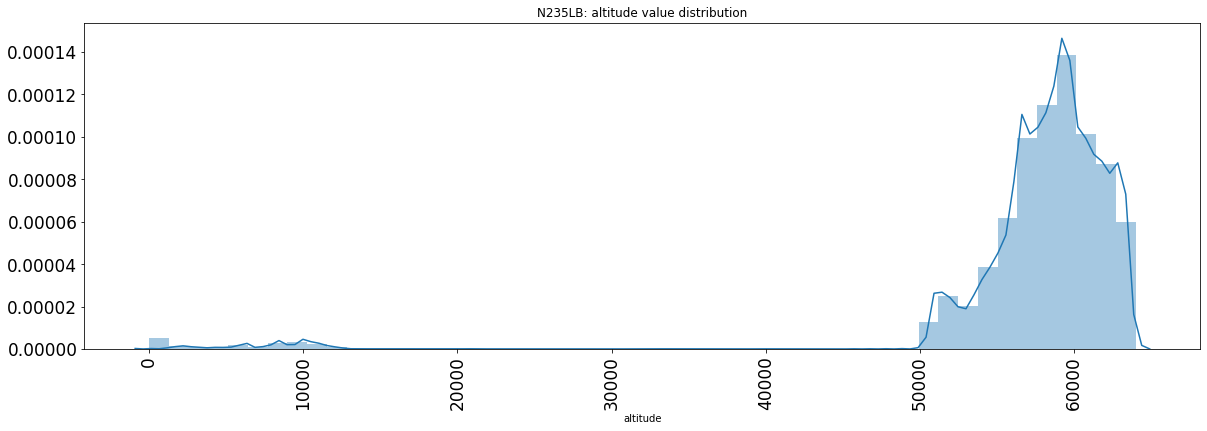

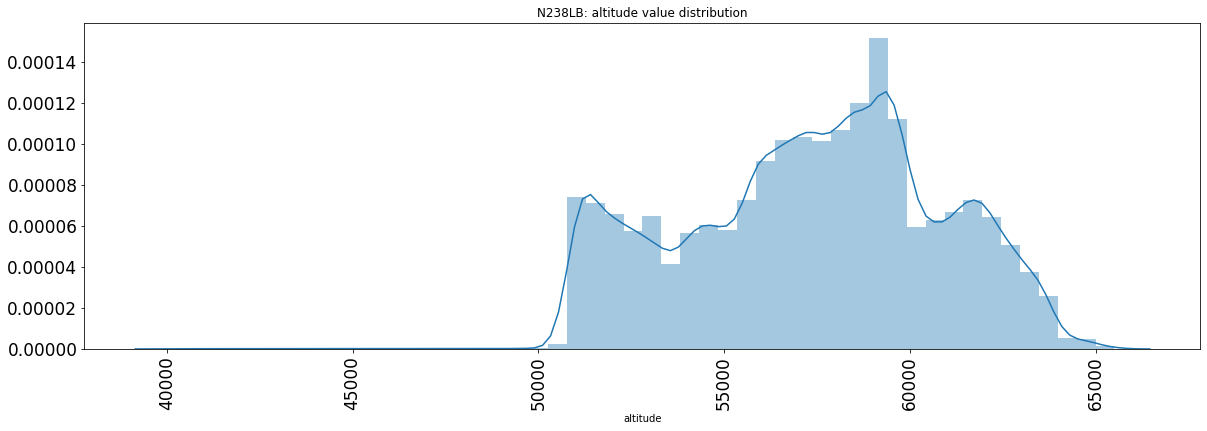

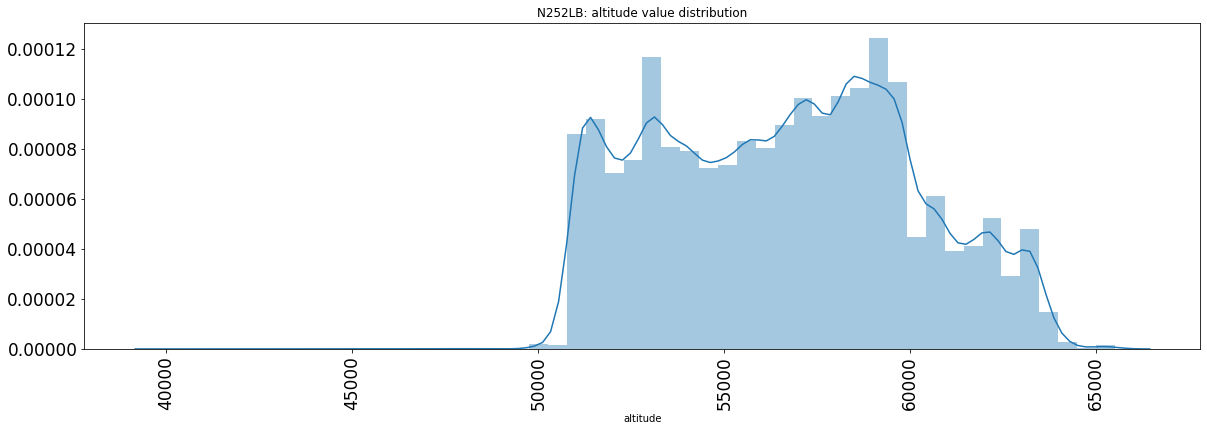

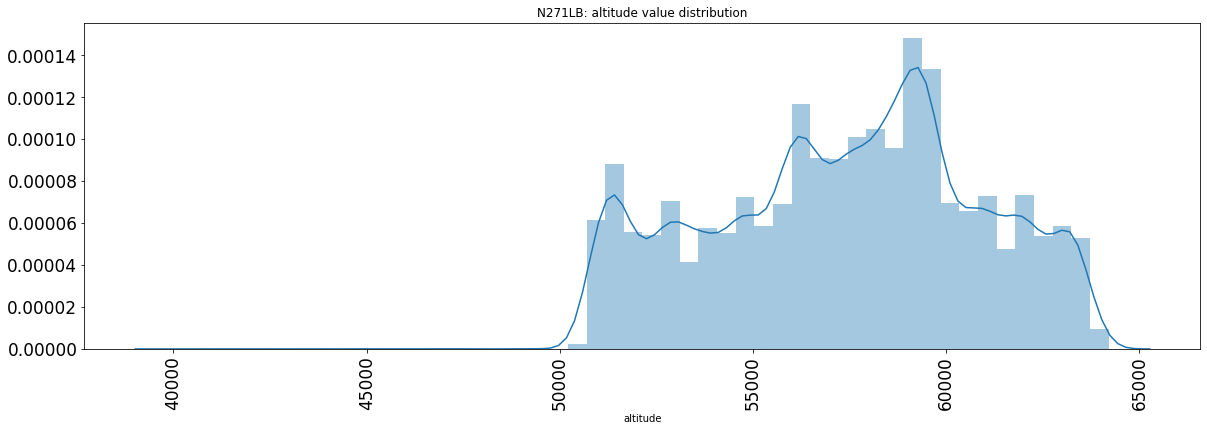

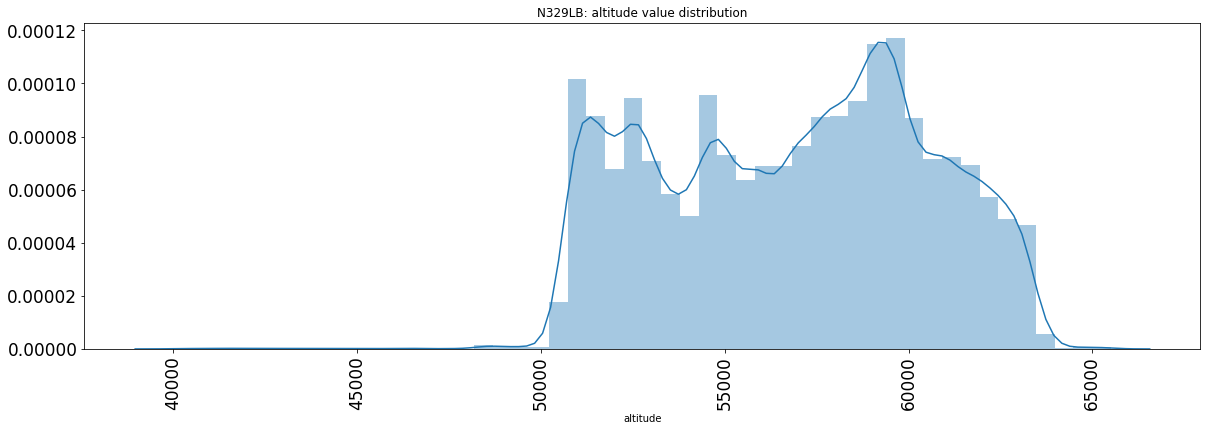

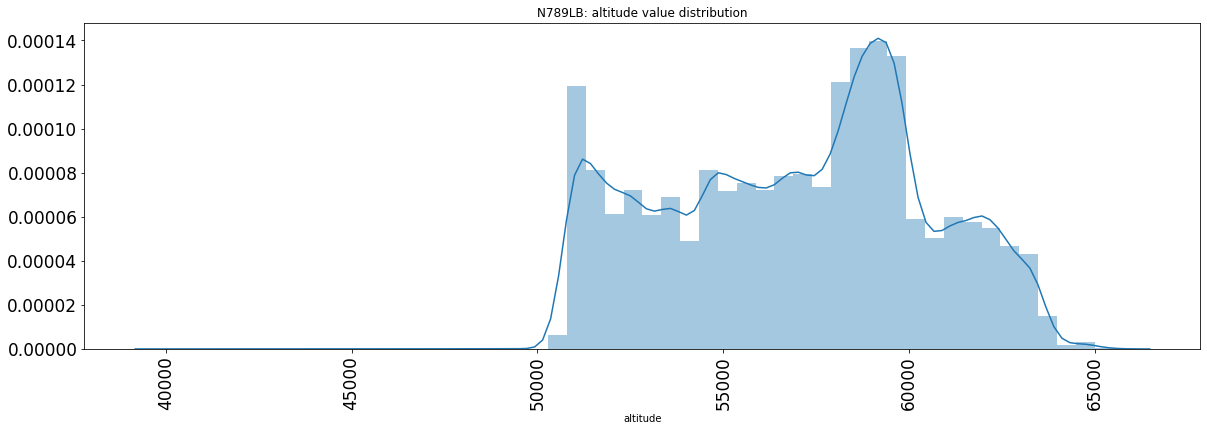

In [31]:
# We can see a similar altitude distribution

flights_to_add = ['N139LB', 'N166LB', 'N211LB', 'N221LB', 'N225LB', 'N226LB', 'N235LB', 'N238LB', 'N252LB',\
                  'N271LB', 'N329LB', 'N789LB']

for loon in flights_to_add:
    
    

    plt.figure(figsize=(20,6))
    plt.xticks(rotation=90)

    ax = sns.distplot(bl.loc[bl.registration_id == loon].alt)

    #ax.set(ylim=(0, 50))
    dummy = ax.set_xlabel('altitude')
    dummy = ax.set_title(loon + ': altitude value distribution')
    
    dummy = ax.tick_params(labelsize=17)
    
# Let's look for something special on loons N226LB and N235LB


In [32]:
#bl_day = bl.loc[(bl.sun_light == True) & (bl.stationary == True)]
#bl_night = bl.loc[(bl.sun_light == False) &(bl.stationary == True)]

bl_day = bl.loc[(bl.sun_light == True) ]
bl_night = bl.loc[(bl.sun_light == False)]



In [33]:
bl_day

,ts,aircraft_id,alt,speed,Direction,registration_id,lat,lon,alt_change,sun_light,vertical_dir
727,2017-12-06 13:51:27+00:00,HBAL048,55100,53,115,N139LB,36.049263,-108.085831,0.0,True,idle
728,2017-12-06 13:52:28+00:00,HBAL048,55000,54,115,N139LB,36.043030,-108.069244,-100.0,True,down
729,2017-12-06 13:53:36+00:00,HBAL048,55000,53,114,N139LB,36.035934,-108.050018,0.0,True,idle
730,2017-12-06 13:54:37+00:00,HBAL048,55100,51,115,N139LB,36.029755,-108.033356,100.0,True,up
731,2017-12-06 13:55:38+00:00,HBAL048,55100,51,115,N139LB,36.023563,-108.016876,0.0,True,idle
...,...,...,...,...,...,...,...,...,...,...,...
2411968,2020-05-03 23:11:30+00:00,HBAL043,60800,16,277,N789LB,-5.045563,-81.260796,100.0,True,up
2411969,2020-05-03 23:16:34+00:00,HBAL043,60800,16,277,N789LB,-5.044235,-81.282677,0.0,True,idle
2411970,2020-05-03 23:21:36+00:00,HBAL043,60400,16,284,N789LB,-5.041122,-81.304695,-400.0,True,down
2411971,2020-05-03 23:26:38+00:00,HBAL043,60200,19,284,N789LB,-5.034718,-81.329086,-200.0,True,down


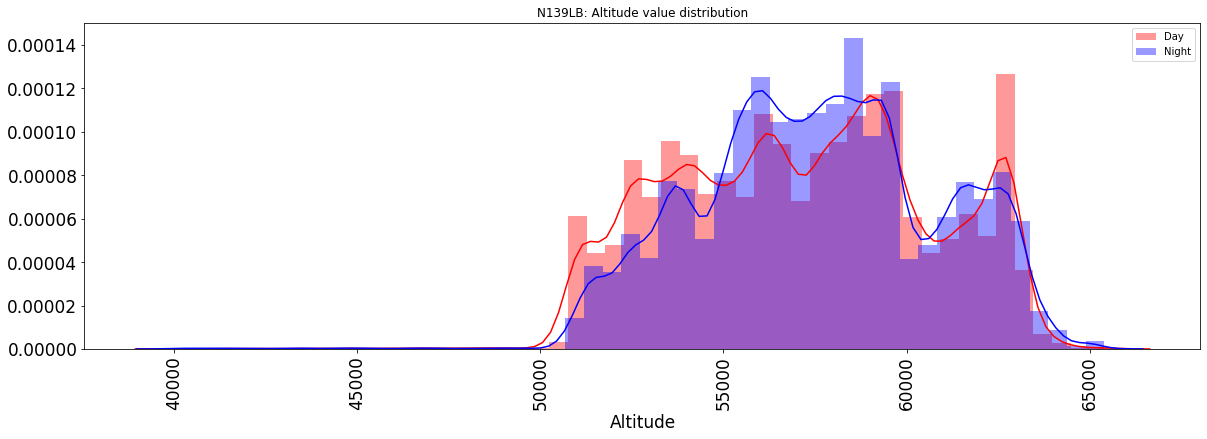

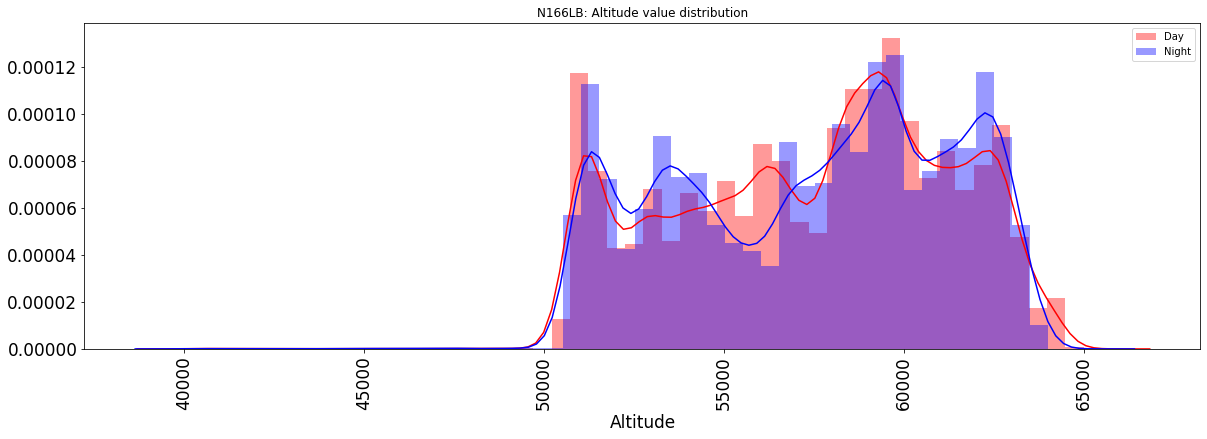

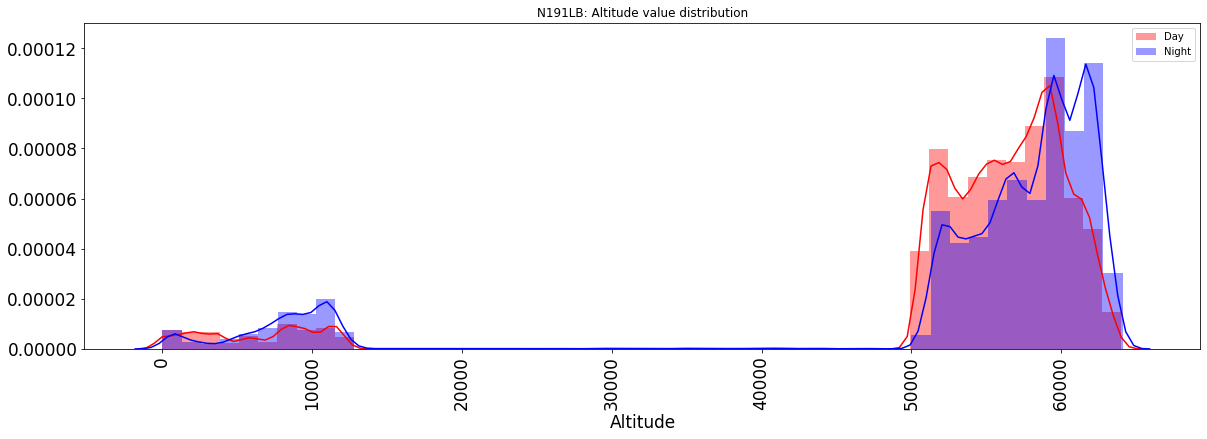

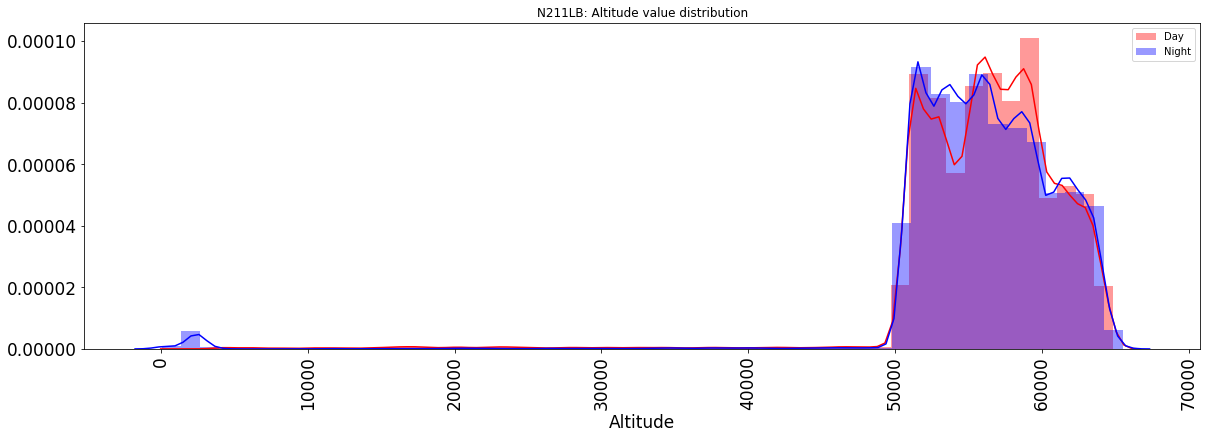

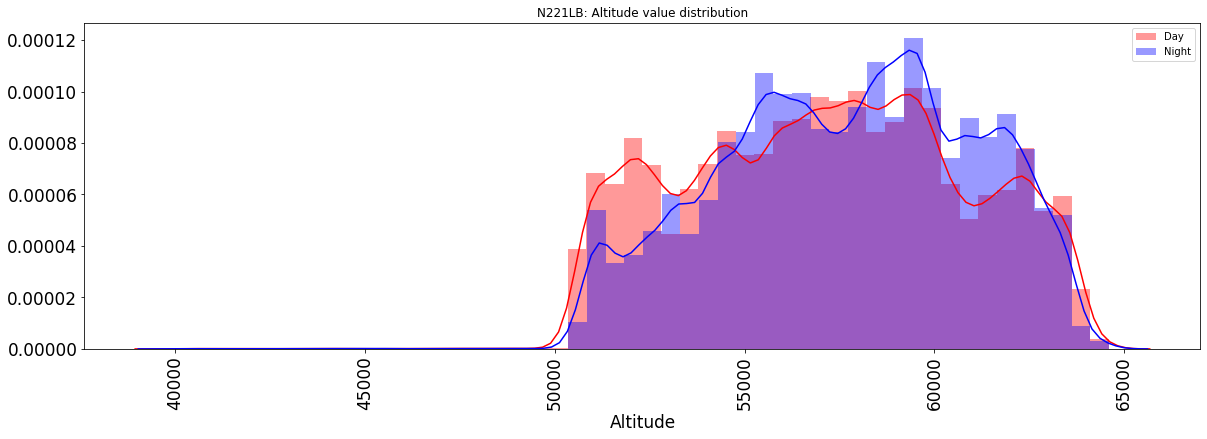

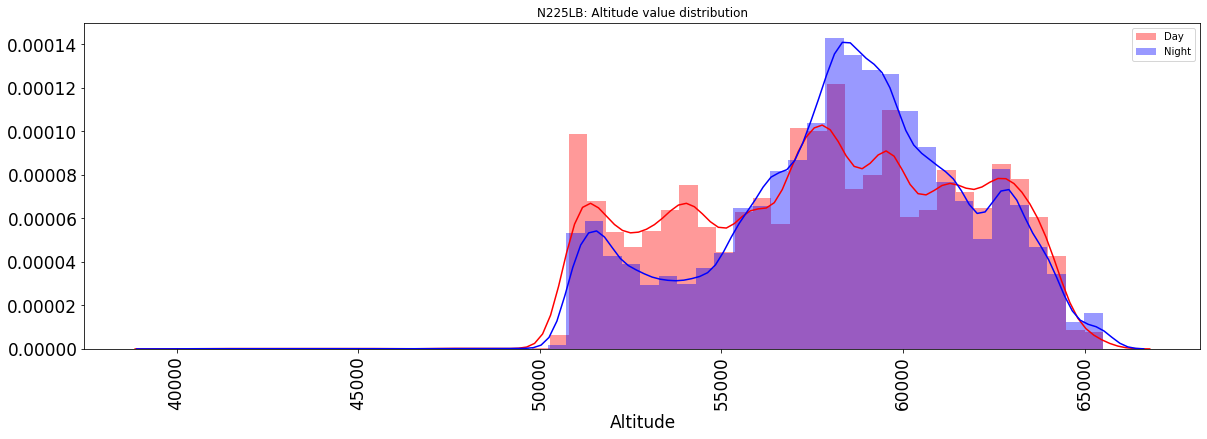

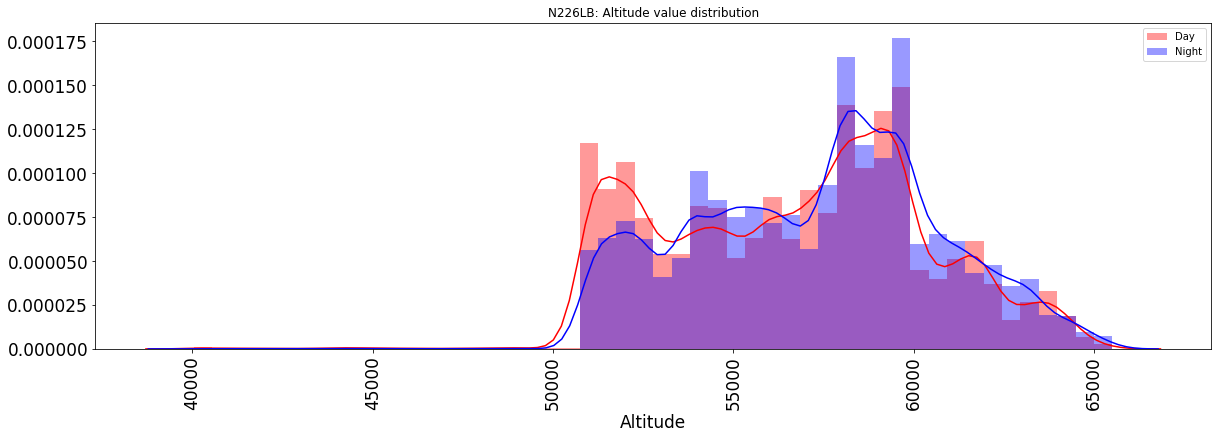

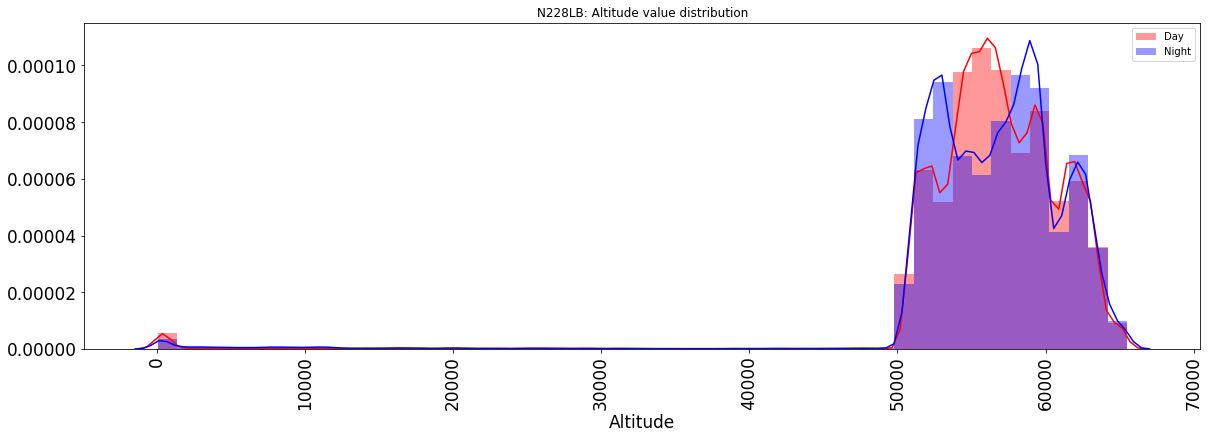

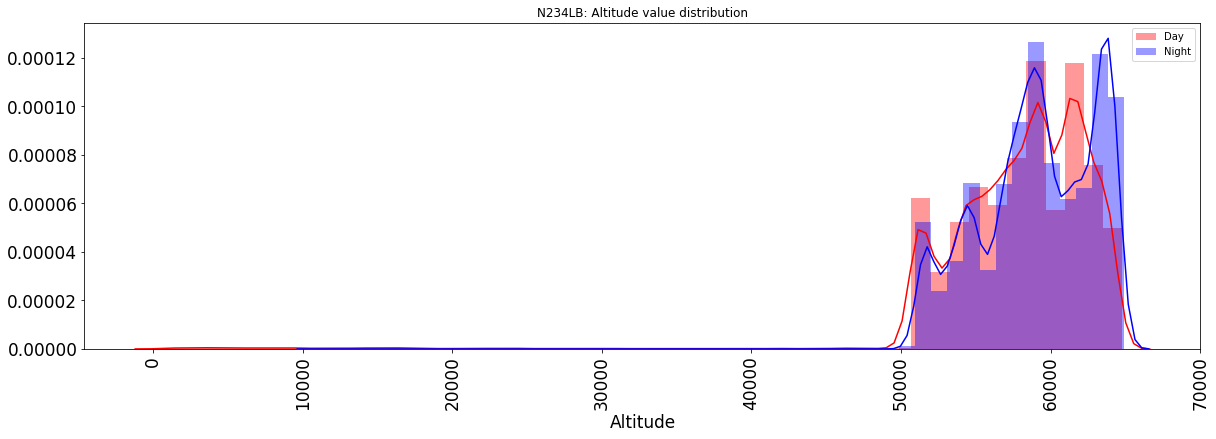

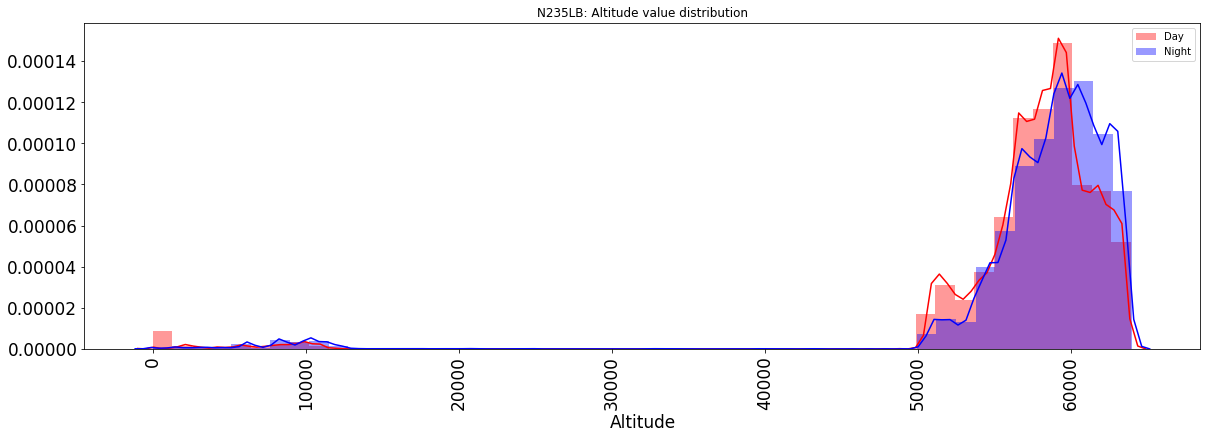

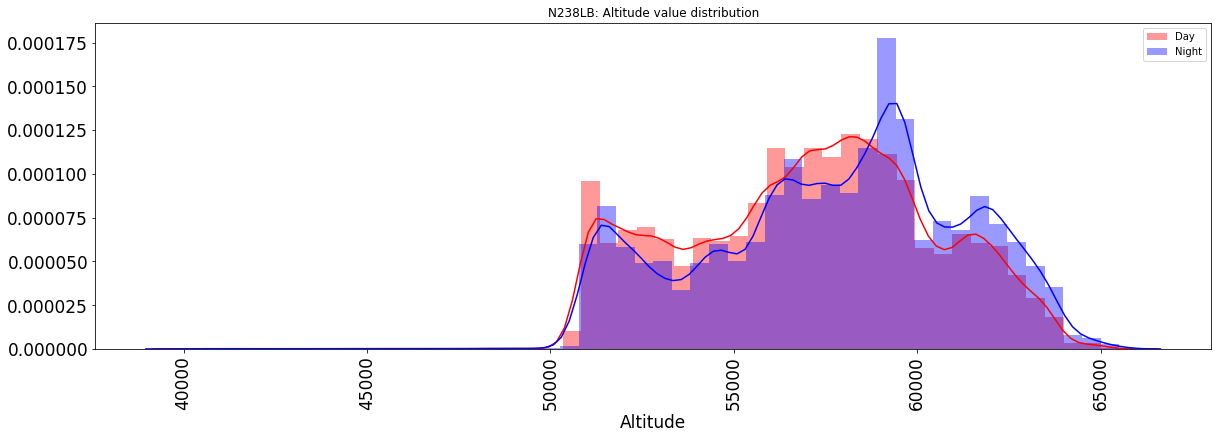

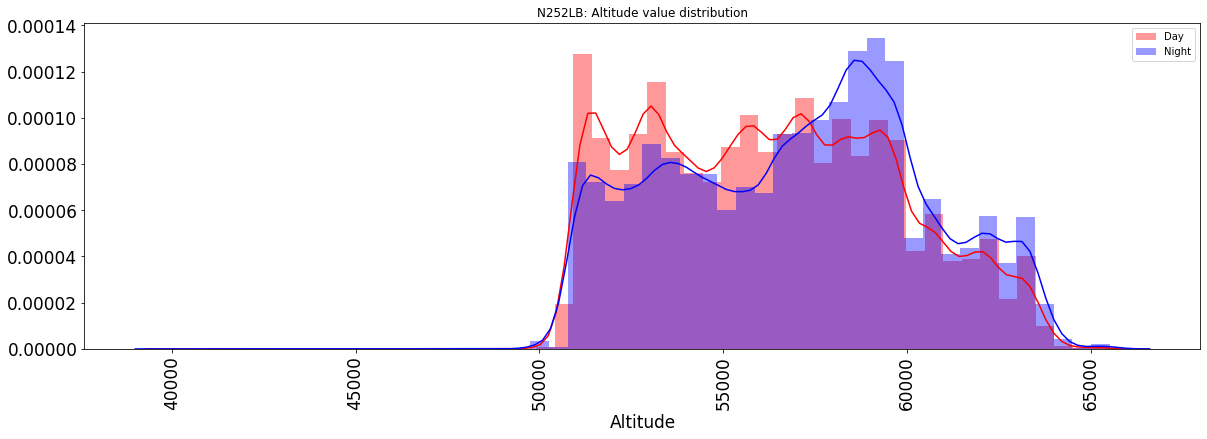

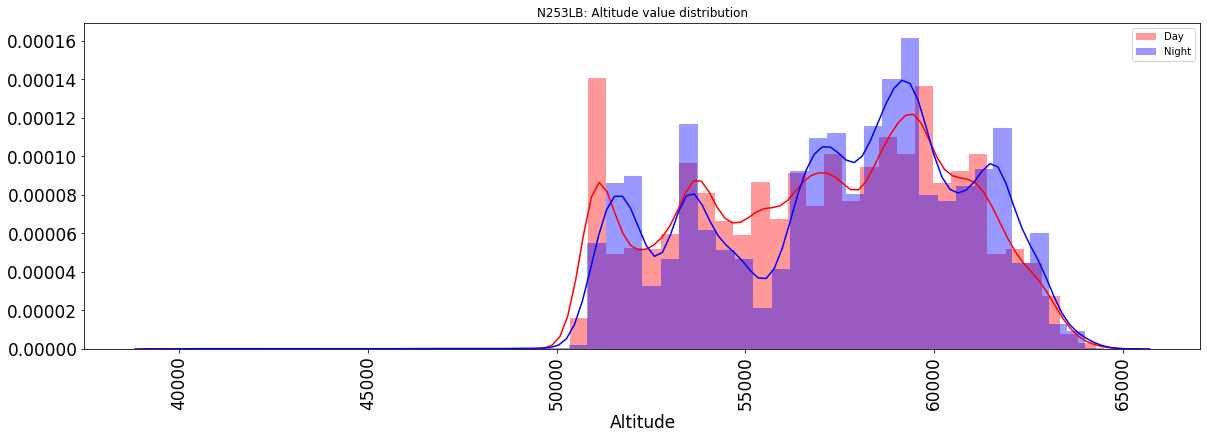

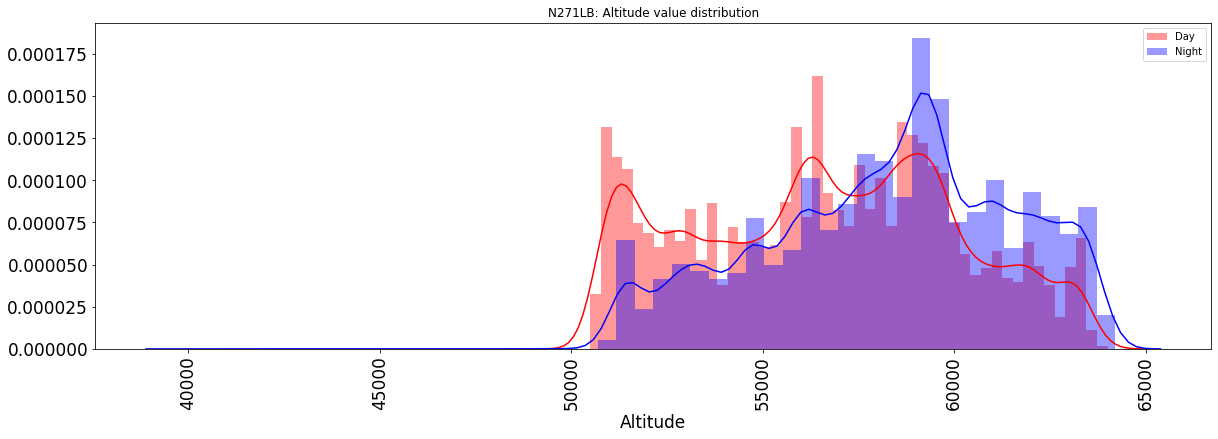

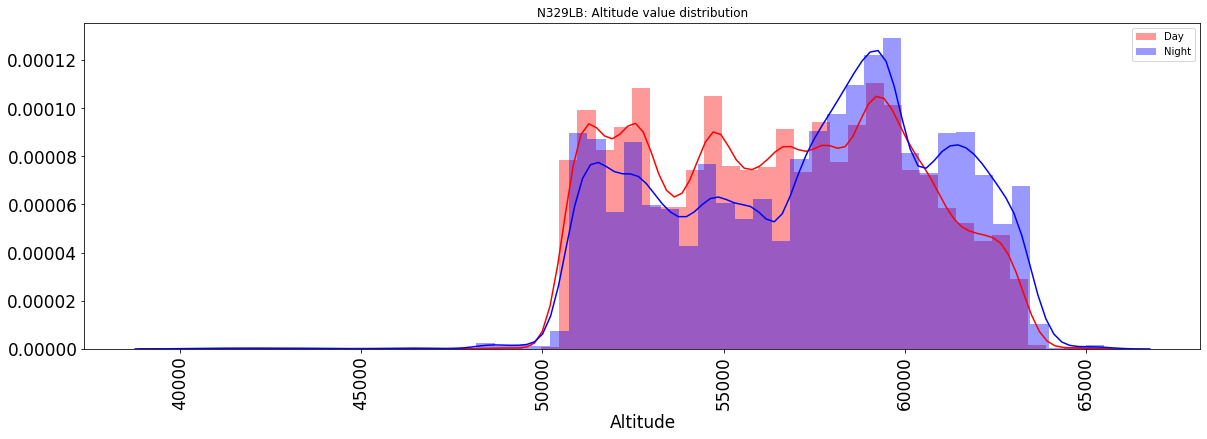

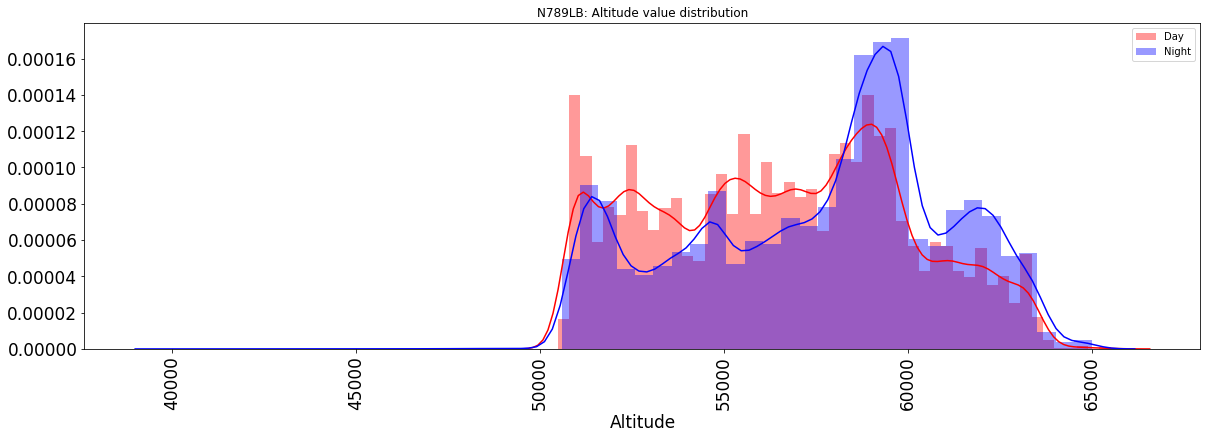

In [37]:
# Let's compare day vs night
flights_to_add = ['N139LB', 'N166LB', 'N191LB', 'N211LB', 'N221LB', 'N225LB', 'N226LB', 'N228LB', 'N234LB',
                  'N235LB', 'N238LB', 'N252LB', 'N253LB', 'N271LB', 'N329LB', 'N789LB']

for loon in flights_to_add:
    
    

    plt.figure(figsize=(20,6))
    plt.xticks(rotation=90)
    
    ax = sns.distplot(bl_day.loc[bl_day.registration_id == loon].alt, color = 'r', label="Day")
    
    
    #ax.set(ylim=(0, 50))
    dummy = ax.set_xlabel('Altitude', fontsize=17)
    dummy = ax.set_title(loon + ': Altitude value distribution')
    
    dummy = ax.tick_params(labelsize=17)
    
    ax2 = sns.distplot(bl_night.loc[bl_night.registration_id == loon].alt, color = 'b', label="Night")
    plt.legend()
    dummy = ax2.set_xlabel('Altitude', fontsize=17)
    dummy = ax2.set_title(loon + ': Altitude value distribution')
    
    dummy = ax2.tick_params(labelsize=17)
    

In [24]:
#Create a basemap 
map = KeplerGl(height=700, width=800)#show the map
map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=700)

In [25]:
# Create a geodataframe
gdf = gpd.GeoDataFrame(bl, geometry=gpd.points_from_xy(bl.lon, bl.lat))

map.add_data(data=gdf, name="loon traces")